In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [134]:
#read dataset
#data = pd.read_csv("/content/drive/MyDrive/CIND 820 Capstone Project/categoricaltonumericdata.csv")
data = pd.read_csv("/content/drive/MyDrive/CIND 820 Capstone Project/merged_completedata.csv")
data.shape

(78032, 28)

In [135]:
data.head()

,RecordID,X,Y,FID,BusinessID,Name,Address,StreetNo,StreetName,BldgNo,...,Fax,TollFree,EMail,WebAddress,EmplRange,CENT_X,CENT_Y,Year,isnew,Closed
0,1,-79.689829,43.644181,1,1055,Golf Trends Inc.,300 Ambassador Dr,300,Ambassador Dr,No,...,905-795-8988,Yes,Yes,Yes,3,605668.2538,4.833187e+06,2016,No,No
1,2,-79.689419,43.644988,2,1057,Apex Graphics Inc.,320 Ambassador Dr,320,Ambassador Dr,No,...,905-795-8775,No,Yes,Yes,4,605699.9370,4.833277e+06,2016,No,No
2,3,-79.689419,43.644988,3,1058,"Sands, John & Associates Limited",320 Ambassador Dr,320,Ambassador Dr,No,...,905-795-8775,No,No,No,5,605699.9370,4.833277e+06,2016,No,No
3,4,-79.689419,43.644988,4,1060,Printmedia-Tackaberry Times,320 Ambassador Dr,320,Ambassador Dr,No,...,905-564-7395,No,Yes,Yes,1,605699.9370,4.833277e+06,2016,No,No
4,5,-79.690664,43.645493,5,1061,S W R Industries Ltd.,321 Ambassador Dr,321,Ambassador Dr,No,...,905-564-5003,No,Yes,Yes,2,605598.6442,4.833332e+06,2016,No,No


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78032 entries, 0 to 78031
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RecordID    78032 non-null  int64  
 1   X           78032 non-null  float64
 2   Y           78032 non-null  float64
 3   FID         78032 non-null  int64  
 4   BusinessID  78032 non-null  int64  
 5   Name        78032 non-null  object 
 6   Address     78032 non-null  object 
 7   StreetNo    78032 non-null  int64  
 8   StreetName  78032 non-null  object 
 9   BldgNo      78032 non-null  object 
 10  UnitNo      78032 non-null  object 
 11  PostalCode  78032 non-null  object 
 12  Location    78032 non-null  object 
 13  Ward        78032 non-null  int64  
 14  NAICSCode   78032 non-null  int64  
 15  NAICSCat    78032 non-null  object 
 16  NAICSDescr  78032 non-null  object 
 17  Phone       78032 non-null  object 
 18  Fax         78032 non-null  object 
 19  TollFree    78032 non-nul

In [137]:
#NAICSCode back to object as it is nominal not ordinal
data['NAICSCode'] = data['NAICSCode'].astype(str)

In [138]:
#drop unique fields
#data.drop(['FID','BusinessID','Name','Address', 'StreetNo','StreetName','Location','Phone','Fax','NAICSDescr','EMail','NAICSCode','BldgNo','UnitNo','PostalCode','NAICSCat','TollFree','WebAddress','isnew'], axis=1, inplace=True)
data.drop(['RecordID','FID','BusinessID','Name','Address', 'StreetNo','StreetName','NAICSDescr'], axis=1, inplace=True)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78032 entries, 0 to 78031
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           78032 non-null  float64
 1   Y           78032 non-null  float64
 2   BldgNo      78032 non-null  object 
 3   UnitNo      78032 non-null  object 
 4   PostalCode  78032 non-null  object 
 5   Location    78032 non-null  object 
 6   Ward        78032 non-null  int64  
 7   NAICSCode   78032 non-null  object 
 8   NAICSCat    78032 non-null  object 
 9   Phone       78032 non-null  object 
 10  Fax         78032 non-null  object 
 11  TollFree    78032 non-null  object 
 12  EMail       78032 non-null  object 
 13  WebAddress  78032 non-null  object 
 14  EmplRange   78032 non-null  int64  
 15  CENT_X      78032 non-null  float64
 16  CENT_Y      78032 non-null  float64
 17  Year        78032 non-null  int64  
 18  isnew       78032 non-null  object 
 19  Closed      78032 non-nul

In [140]:
#decribe categorical data
data.describe(include='O')
#There is none if I get an error

,BldgNo,UnitNo,PostalCode,Location,NAICSCode,NAICSCat,Phone,Fax,TollFree,EMail,WebAddress,isnew,Closed
count,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032
unique,2,2,37,56,24,19,25064,15752,2,2,2,2,2
top,No,Yes,L4W,Northeast EA (West),81,Retail Trade,,,No,Yes,Yes,No,No
freq,73798,53665,12410,21104,9052,11071,1457,29473,66596,47406,56765,71148,71617


In [141]:
#if there is categorical data then factorize it
data['WebAddress'] = pd.factorize(data['WebAddress'])[0]
data['BldgNo'] = pd.factorize(data['BldgNo'])[0]
data['Fax'] = pd.factorize(data['Fax'])[0]
data['TollFree'] = pd.factorize(data['TollFree'])[0]
data['UnitNo'] = pd.factorize(data['UnitNo'])[0]
data['isnew'] = pd.factorize(data['isnew'])[0]
data['Closed'] = pd.factorize(data['Closed'])[0]
data['NAICSCode'] = pd.factorize(data['NAICSCode'])[0]
data['NAICSCat'] = pd.factorize(data['NAICSCat'])[0]
data['Location'] = pd.factorize(data['Location'])[0]
data['Phone'] = pd.factorize(data['Phone'])[0]
data['EMail'] = pd.factorize(data['EMail'])[0]
data['PostalCode'] = pd.factorize(data['PostalCode'])[0]

In [142]:
data.head()

,X,Y,BldgNo,UnitNo,PostalCode,Location,Ward,NAICSCode,NAICSCat,Phone,Fax,TollFree,EMail,WebAddress,EmplRange,CENT_X,CENT_Y,Year,isnew,Closed
0,-79.689829,43.644181,0,0,0,0,5,0,0,0,0,0,0,0,3,605668.2538,4.833187e+06,2016,0,0
1,-79.689419,43.644988,0,0,0,0,5,1,1,1,1,1,0,0,4,605699.9370,4.833277e+06,2016,0,0
2,-79.689419,43.644988,0,0,0,0,5,1,1,2,1,1,1,1,5,605699.9370,4.833277e+06,2016,0,0
3,-79.689419,43.644988,0,0,0,0,5,1,1,3,2,1,0,0,1,605699.9370,4.833277e+06,2016,0,0
4,-79.690664,43.645493,0,0,0,0,5,0,0,4,3,1,0,0,2,605598.6442,4.833332e+06,2016,0,0


In [143]:
importances = data.drop('Closed', axis=1).apply(lambda x: x.corr(data.Closed))
indices = np.argsort(importances)
print(importances[indices])

EmplRange    -0.047171
Year         -0.043896
CENT_Y       -0.033631
Fax          -0.023913
NAICSCode    -0.006639
NAICSCat     -0.006051
PostalCode   -0.004191
X            -0.004051
Y            -0.002768
TollFree      0.001339
BldgNo        0.001632
Ward          0.005117
CENT_X        0.008961
Phone         0.010661
Location      0.011091
WebAddress    0.021861
EMail         0.022285
isnew         0.027482
UnitNo        0.037975
dtype: float64


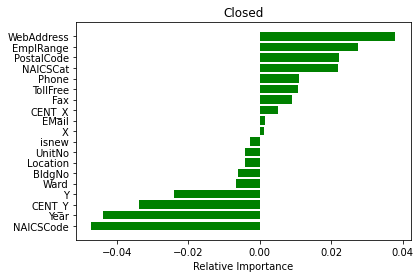

In [148]:
#names=['UnitNo','isnew','EMail','WebAddress','Location','Phone','CENT_X', 'Ward', 'BldgNo','TollFree','Y','X','PostalCode','NAICSCat','NAICSCode','Fax','CENT_Y','Year','EmplRange']
plt.title('Closed')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [145]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.2:
        print(names[i])
#only WebAddress is close to 0.4!

In [146]:
X= data[ ['Fax','UnitNo', 'CENT_X', 'Phone', 'NAICSCat','TollFree','WebAddress','PostalCode','CENT_Y', 'Ward']]


In [147]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

Fax  is not correlated  with  UnitNo
Fax  is not correlated  with  CENT_X
Fax  is not correlated  with  NAICSCat
Fax  is not correlated  with  TollFree
Fax  is not correlated  with  WebAddress
Fax  is not correlated  with  PostalCode
Fax  is not correlated  with  CENT_Y
Fax  is not correlated  with  Ward
UnitNo  is not correlated  with  Fax
UnitNo  is not correlated  with  CENT_X
UnitNo  is not correlated  with  Phone
UnitNo  is not correlated  with  NAICSCat
UnitNo  is not correlated  with  TollFree
UnitNo  is not correlated  with  WebAddress
UnitNo  is not correlated  with  PostalCode
UnitNo  is not correlated  with  CENT_Y
UnitNo  is not correlated  with  Ward
CENT_X  is not correlated  with  Fax
CENT_X  is not correlated  with  UnitNo
CENT_X  is not correlated  with  Phone
CENT_X  is not correlated  with  NAICSCat
CENT_X  is not correlated  with  TollFree
CENT_X  is not correlated  with  WebAddress
CENT_X  is not correlated  with  PostalCode
CENT_X  is not correlated  with  CENT_Y


In [ ]:
X= dataset[ ['NAICSCat’, ‘acceleration’, ‘model year’]]